# LINEAR REGRESSION

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

sns.set()
pd.set_option('display.precision', 3)

Read data

In [40]:
datasetTrain = pd.read_csv('../Dades/X_train_modified.csv')
datasetTest  = pd.read_csv('../Dades/X_test_modified.csv')

columsToDrop = ['Maximum Installs', 'Price', 'Size', 'Download', 'Last Updated', 'Installs', 'LogInstalls']
categoricalColumns = ['Category', 'Free', 'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice']

# Convert to categorical variables
for column in categoricalColumns:
    datasetTrain[column] = datasetTrain[column].astype('category')
    datasetTest[column] = datasetTest[column].astype('category')

# Drop repeated or unwanted data (Installs is the catageorial version of "Maximum installs")
datasetTrain = datasetTrain.drop(columns=columsToDrop)
datasetTest  = datasetTest.drop(columns=columsToDrop)
    
datasetTrain.dtypes

Category              category
Rating                 float64
Free                  category
Released               float64
Content Rating        category
Ad Supported          category
In App Purchases      category
Editors Choice        category
LogMaximumInstalls     float64
LinearizedRating       float64
LinearizedPrice        float64
LogSize                float64
LogLast Updated        float64
dtype: object

Intead of ignoring categorical variables, we will do a smart trick. For each of varible, if there are $k$ categries, we will create $k$ new binary variables were the $i-th$ variable will be one iff the original variable value is the $i-th$ category

In [79]:
def convertDataSet(X, l):
    for column in l:
        Classes = X[column].unique()
        for i in Classes:
            name = column + str(i)
            X[name] = X[column]
            X[name] = np.where(X[name] == i, 1, 0)
        
        
convertDataSet(datasetTrain, categoricalColumns)
convertDataSet(datasetTest, categoricalColumns)

datasetTrain = datasetTrain.drop(columns=categoricalColumns)
datasetTest  = datasetTest.drop(columns=columsToDrop)

datasetTrain.dtypes

KeyError: 'Category'

Construct X and Y

In [80]:
Xtrain = datasetTrain.loc[:, datasetTrain.columns != 'LogMaximumInstalls']
Ytrain = datasetTrain['LogMaximumInstalls']

Xtest = datasetTest.loc[:, datasetTest.columns != 'LogMaximumInstalls']
Ytest = datasetTest['LogMaximumInstalls']

Regression

In [90]:
# We instantiate a linear regression. 
lr = LinearRegression()

# Now we train it on train data with fit method
lr.fit(Xtrain,Ytrain)

# We can predict using the predict method
Ypred = lr.predict(Xtrain)

weights = lr.coef_
intercept = lr.intercept_
# You can access to some info about the model, like the weights.
print('Coefficients: \n', weights[:10])
print('Intercept: \n', intercept)



# alternately
model = sm.OLS(Ytrain, sm.add_constant(Xtrain))
result = model.fit()
result.summary()

Coefficients: 
 [ 9.05860099e-01  3.84607694e-01 -7.49907295e-01 -3.89046812e-02
  3.51924992e-02 -2.59358808e-01 -8.48886754e+08 -1.70809307e+10
 -2.64980770e+09  2.89673412e+08]
Intercept: 
 -37378203110.24634


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     LogMaximumInstalls   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1798.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:48:41   Log-Likelihood:            -3.0201e+05
No. Observations:              249862   AIC:                         6.041e+05
Df Residuals:                  249799   BIC:                         6.048e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             3.254e+11   1.43e+11      2.270      0.023    4.45e+10    6.06e+11
Rating                               0.9059      0.011     81.928      0.000       0.884       0.928
Released                             0.3846      0.003    144.403      0.000       0.379       0.390
LinearizedRating                    -0.7499      0.007   -106.886      0.000      -0.764      -0.736
LinearizedPrice                     -0.0388      0.007     -5.893      0.000      -0.052      -0.026
LogSize                              0.0352      0.002     20.100      0.000       0.032       0.039
LogLast Updated                     -0.2593      0.002   -136.419      0.000      -0.263      -0.256
CategoryPuzzle                    1.024e+10   4.51e+09      2.270      0.023     1.4e+09    1.91e+10
CategoryEducation                 -3.32e+09   1.46e+09     -2.270      0.023   -6.19e+09   -4.54e+08
CategoryTools                     1.507e+10   6.64e+09      2.270      0.023    2.06e+09    2.81e+10
CategoryEntertainment             1.172e+10   5.16e+09      2.270      0.023     1.6e+09    2.18e+10
CategoryHealth & Fitness          6.933e+09   3.05e+09      2.270      0.023    9.48e+08    1.29e+10
CategoryEducational                6.58e+09    2.9e+09      2.270      0.023       9e+08    1.23e+10
CategoryLifestyle                 1.329e+10   5.85e+09      2.270      0.023    1.82e+09    2.48e+10
CategoryBooks & Reference         9.286e+09   4.09e+09      2.270      0.023    1.27e+09    1.73e+10
CategoryPersonalization           9.157e+09   4.03e+09      2.270      0.023    1.25e+09    1.71e+10
CategoryRole Playing              6.774e+09   2.98e+09      2.270      0.023    9.26e+08    1.26e+10
CategoryMusic & Audio             1.046e+10   4.61e+09      2.270      0.023    1.43e+09    1.95e+10
CategoryNews & Magazines          8.015e+09   3.53e+09      2.270      0.023     1.1e+09    1.49e+10
CategoryHouse & Home               7.82e+09   3.44e+09      2.270      0.023    1.07e+09    1.46e+10
CategorySocial                     1.21e+10   5.33e+09      2.270      0.023    1.65e+09    2.25e+10
CategoryBusiness                  1.409e+10    6.2e+09      2.270      0.023    1.93e+09    2.62e+10
CategoryAdventure                 7.525e+09   3.31e+09      2.270      0.023    1.03e+09     1.4e+10
CategoryRacing                    9.984e+09    4.4e+09      2.270      0.023    1.37e+09    1.86e+10
CategoryFinance                   1.007e+10   4.44e+09      2.270      0.023    1.38e+09    1.88e+10
CategoryBoard                     9.974e+09   4.39e+09      2.270      0.023    1.36e+09    1.86e+10
CategorySports                    5.857e+09   2.58e+09      2.270      0.023    8.01e+08    1.09e+10
CategoryShopping                  8.214e+09   3.62e+0

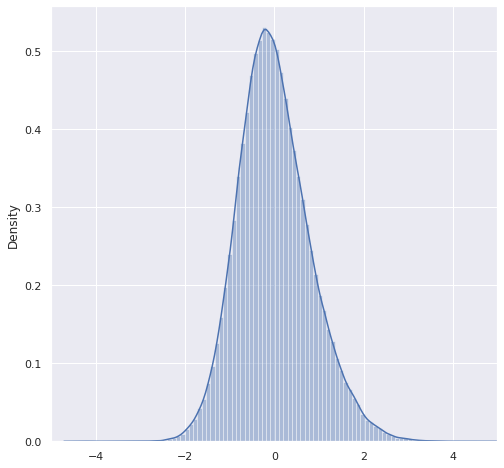

In [91]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-5,5])
sns.distplot(result.resid,bins=100);

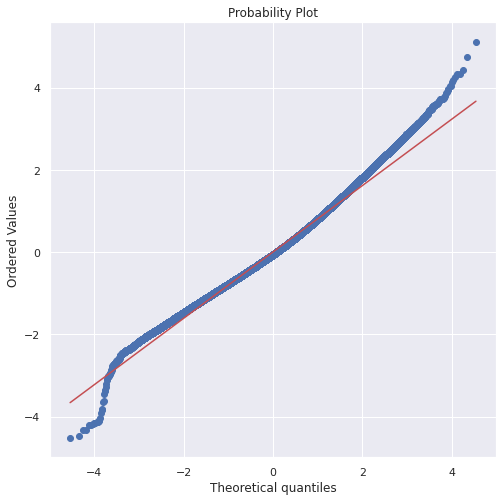

In [92]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid, plot=plt);

Analizing perfomance (metrics)

In [95]:
N = Xtrain.shape[0]
# using statsmodel
prediction = result.predict(sm.add_constant(Xtrain))
mean_square_error_sk = mean_squared_error(Ytrain, prediction)
print(mean_square_error_sk)

0.656719782964256


In [100]:
norm_mse_sk = 1-r2_score(Ytrain,prediction)
print(norm_mse_sk)

R_squared_sk = r2_score(Ytrain,prediction) 
print(R_squared_sk)

0.6914791071354462
0.30852089286455375


In [104]:
predTest = result.predict(sm.add_constant(Xtest))
mean_square_error_sk = mean_squared_error(Ytest, predTest)
print(mean_square_error_sk)

0.7201048449851468


El MSE es identico!

## SECTION 5: Regularized Linear Regression: Ridge and Lasso

First we look for the $lambda$ that fits better out model...